In [16]:
import os
import urllib
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import numpy as np

In [17]:
import glob
from osgeo import gdal
import rasterio as rio
import rasterio.plot
from rasterio.enums import Resampling

In [39]:
!gdalinfo "../SnowHydro/data/Model_Output/N47_0W124_0_agg_16_SWE_SCA_POST_WY2015_16.nc"

Warning 1: No UNIDATA NC_GLOBAL:Conventions attribute
Driver: netCDF/Network Common Data Format
Files: ../SnowHydro/data/Model_Output/N47_0W124_0_agg_16_SWE_SCA_POST_WY2015_16.nc
Size is 512, 512
Subdatasets:
  SUBDATASET_1_NAME=NETCDF:"../SnowHydro/data/Model_Output/N47_0W124_0_agg_16_SWE_SCA_POST_WY2015_16.nc":SWE_Post
  SUBDATASET_1_DESC=[366x5x225x225] SWE_Post (32-bit floating-point)
  SUBDATASET_2_NAME=NETCDF:"../SnowHydro/data/Model_Output/N47_0W124_0_agg_16_SWE_SCA_POST_WY2015_16.nc":SCA_Post
  SUBDATASET_2_DESC=[366x5x225x225] SCA_Post (32-bit floating-point)
Corner Coordinates:
Upper Left  (    0.0,    0.0)
Lower Left  (    0.0,  512.0)
Upper Right (  512.0,    0.0)
Lower Right (  512.0,  512.0)
Center      (  256.0,  256.0)


In [53]:
src = rio.open('netcdf:../SnowHydro/data/Model_Output/N47_0W124_0_agg_16_SWE_SCA_POST_WY2015_16.nc:SWE_Post')
src.profile

TypeError: 'NoneType' object is not callable

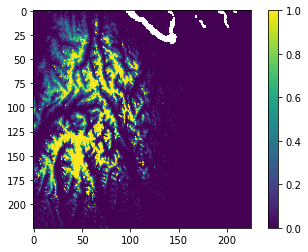

In [41]:
swe = src.read(724,masked=True)
f,ax = plt.subplots()
colorbar = ax.imshow(swe,vmax=1);
f.colorbar(colorbar)

In [58]:
src_crs = 'EPSG:4326'
dst_crs = 'EPSG:32610'

In [59]:
out_fn = "../SnowHydro/data/Model_Output/N47_0W124_0_agg_16_SWE_SCA_POST_WY2015_16.nc"
proj_fn = os.path.splitext(out_fn)[0]+'_utm_gdalwarp.tif'

if not os.path.exists(proj_fn):
    !gdalwarp -r cubic -t_srs $dst_crs -s_srs $src_crs $out_fn $proj_fn

Warning 1: No UNIDATA NC_GLOBAL:Conventions attribute
ERROR 1: Input file ../SnowHydro/data/Model_Output/N47_0W124_0_agg_16_SWE_SCA_POST_WY2015_16.nc has no raster bands.


In [ ]:
src_proj = rio.open(proj_fn)
src_proj.profile